# Análise Preditiva de Inadimplência: Um Estudo com o Conjunto HMEQ

## Grupo
<table width="300" border="2">
    <tr>
        <td><b>Nome do Aluno</b> </td>
        <td><b>RA</b></td>
     </tr>  
   <tr>
       <td>André Matteucci</td>
       <td>10403403</td>
   </tr>
    <tr>
        <td>Enzo Casagrande</td>
        <td>10400726</td>
    </tr>
   <tr>
       <td>Enzo Koji</td>
       <td>10403411</td>
   </tr>
   <tr>
       <td>Felipe Ribeiro</td>
       <td>10400831</td>
   </tr>
</table>

## Dataset

### Licença

Este projeto utiliza o [dataset HMEQ_Data](https://www.kaggle.com/datasets/ajay1735/hmeq-data), publicado originalmente por [Ajay Vallala (ajay1735)](https://www.kaggle.com/ajay1735) no Kaggle.

**Licença**: [CC0 1.0 Universal (Domínio Público)](https://creativecommons.org/publicdomain/zero/1.0/)

### Descrição

| Coluna  | Descrição                                                |
|---------|----------------------------------------------------------|
| BAD     | 1 = client defaulted on loan; 0 = loan repaid            |
| LOAN    | Amount of the loan request                               |
| MORTDUE | Amount due on existing mortgage                          |
| VALUE   | Value of current property                                |
| REASON  | DebtCon = debt consolidation; HomeImp = home improvement |
| JOB     | Six occupational categories                              |
| YOJ     | Years at present job                                     |
| DEROG   | Number of major derogatory reports                       |
| DELINQ  | Number of delinquent credit lines                        |
| CLAGE   | Age of oldest trade line in months                       |
| NINQ    | Number of recent credit inquiries                        |
| CLNO    | Number of credit lines                                   |
| DEBTINC | Debt-to-income ratio                                     |

## Análise Exploratória

In [67]:
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from IPython.display import display, Markdown

In [ ]:
df = pd.read_csv("../hmeq.csv")

### Visualização inicial dos dados

In [70]:
# Shape do dataframe
df.shape

(5960, 13)

In [71]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [72]:
# informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [73]:
print("Valores duplicados: ", df.duplicated().sum())

Valores duplicados:  0


In [74]:
display(Markdown("### Valores nulos por coluna"))

null_values = df.isnull().sum()
null_percent = 100 * null_values / len(df)
null_df = pd.DataFrame({
    '#': null_values,
    '%': null_percent.round(2)
})

null_df[null_df['#'] > 0].sort_values('%', ascending=False)

### Valores nulos por coluna

,#,%
DEBTINC,1267,21.26
DEROG,708,11.88
DELINQ,580,9.73
MORTDUE,518,8.69
YOJ,515,8.64
NINQ,510,8.56
CLAGE,308,5.17
JOB,279,4.68
REASON,252,4.23
CLNO,222,3.72


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


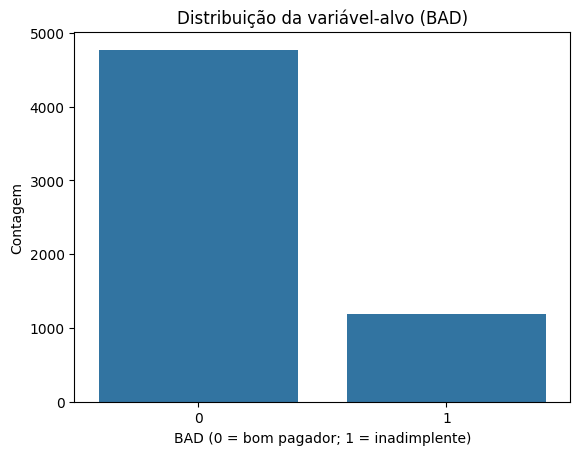

In [76]:
plt.figure()
sns.countplot(data=df, x='BAD')
plt.title("Distribuição da variável-alvo (BAD)")
plt.xlabel("BAD (0 = bom pagador; 1 = inadimplente)")
plt.ylabel("Contagem")
plt.show()

### Distribuição das variáveis

array([[<Axes: title={'center': 'BAD'}>,
        <Axes: title={'center': 'LOAN'}>,
        <Axes: title={'center': 'MORTDUE'}>],
       [<Axes: title={'center': 'VALUE'}>,
        <Axes: title={'center': 'YOJ'}>,
        <Axes: title={'center': 'DEROG'}>],
       [<Axes: title={'center': 'DELINQ'}>,
        <Axes: title={'center': 'CLAGE'}>,
        <Axes: title={'center': 'NINQ'}>],
       [<Axes: title={'center': 'CLNO'}>,
        <Axes: title={'center': 'DEBTINC'}>, <Axes: >]], dtype=object)

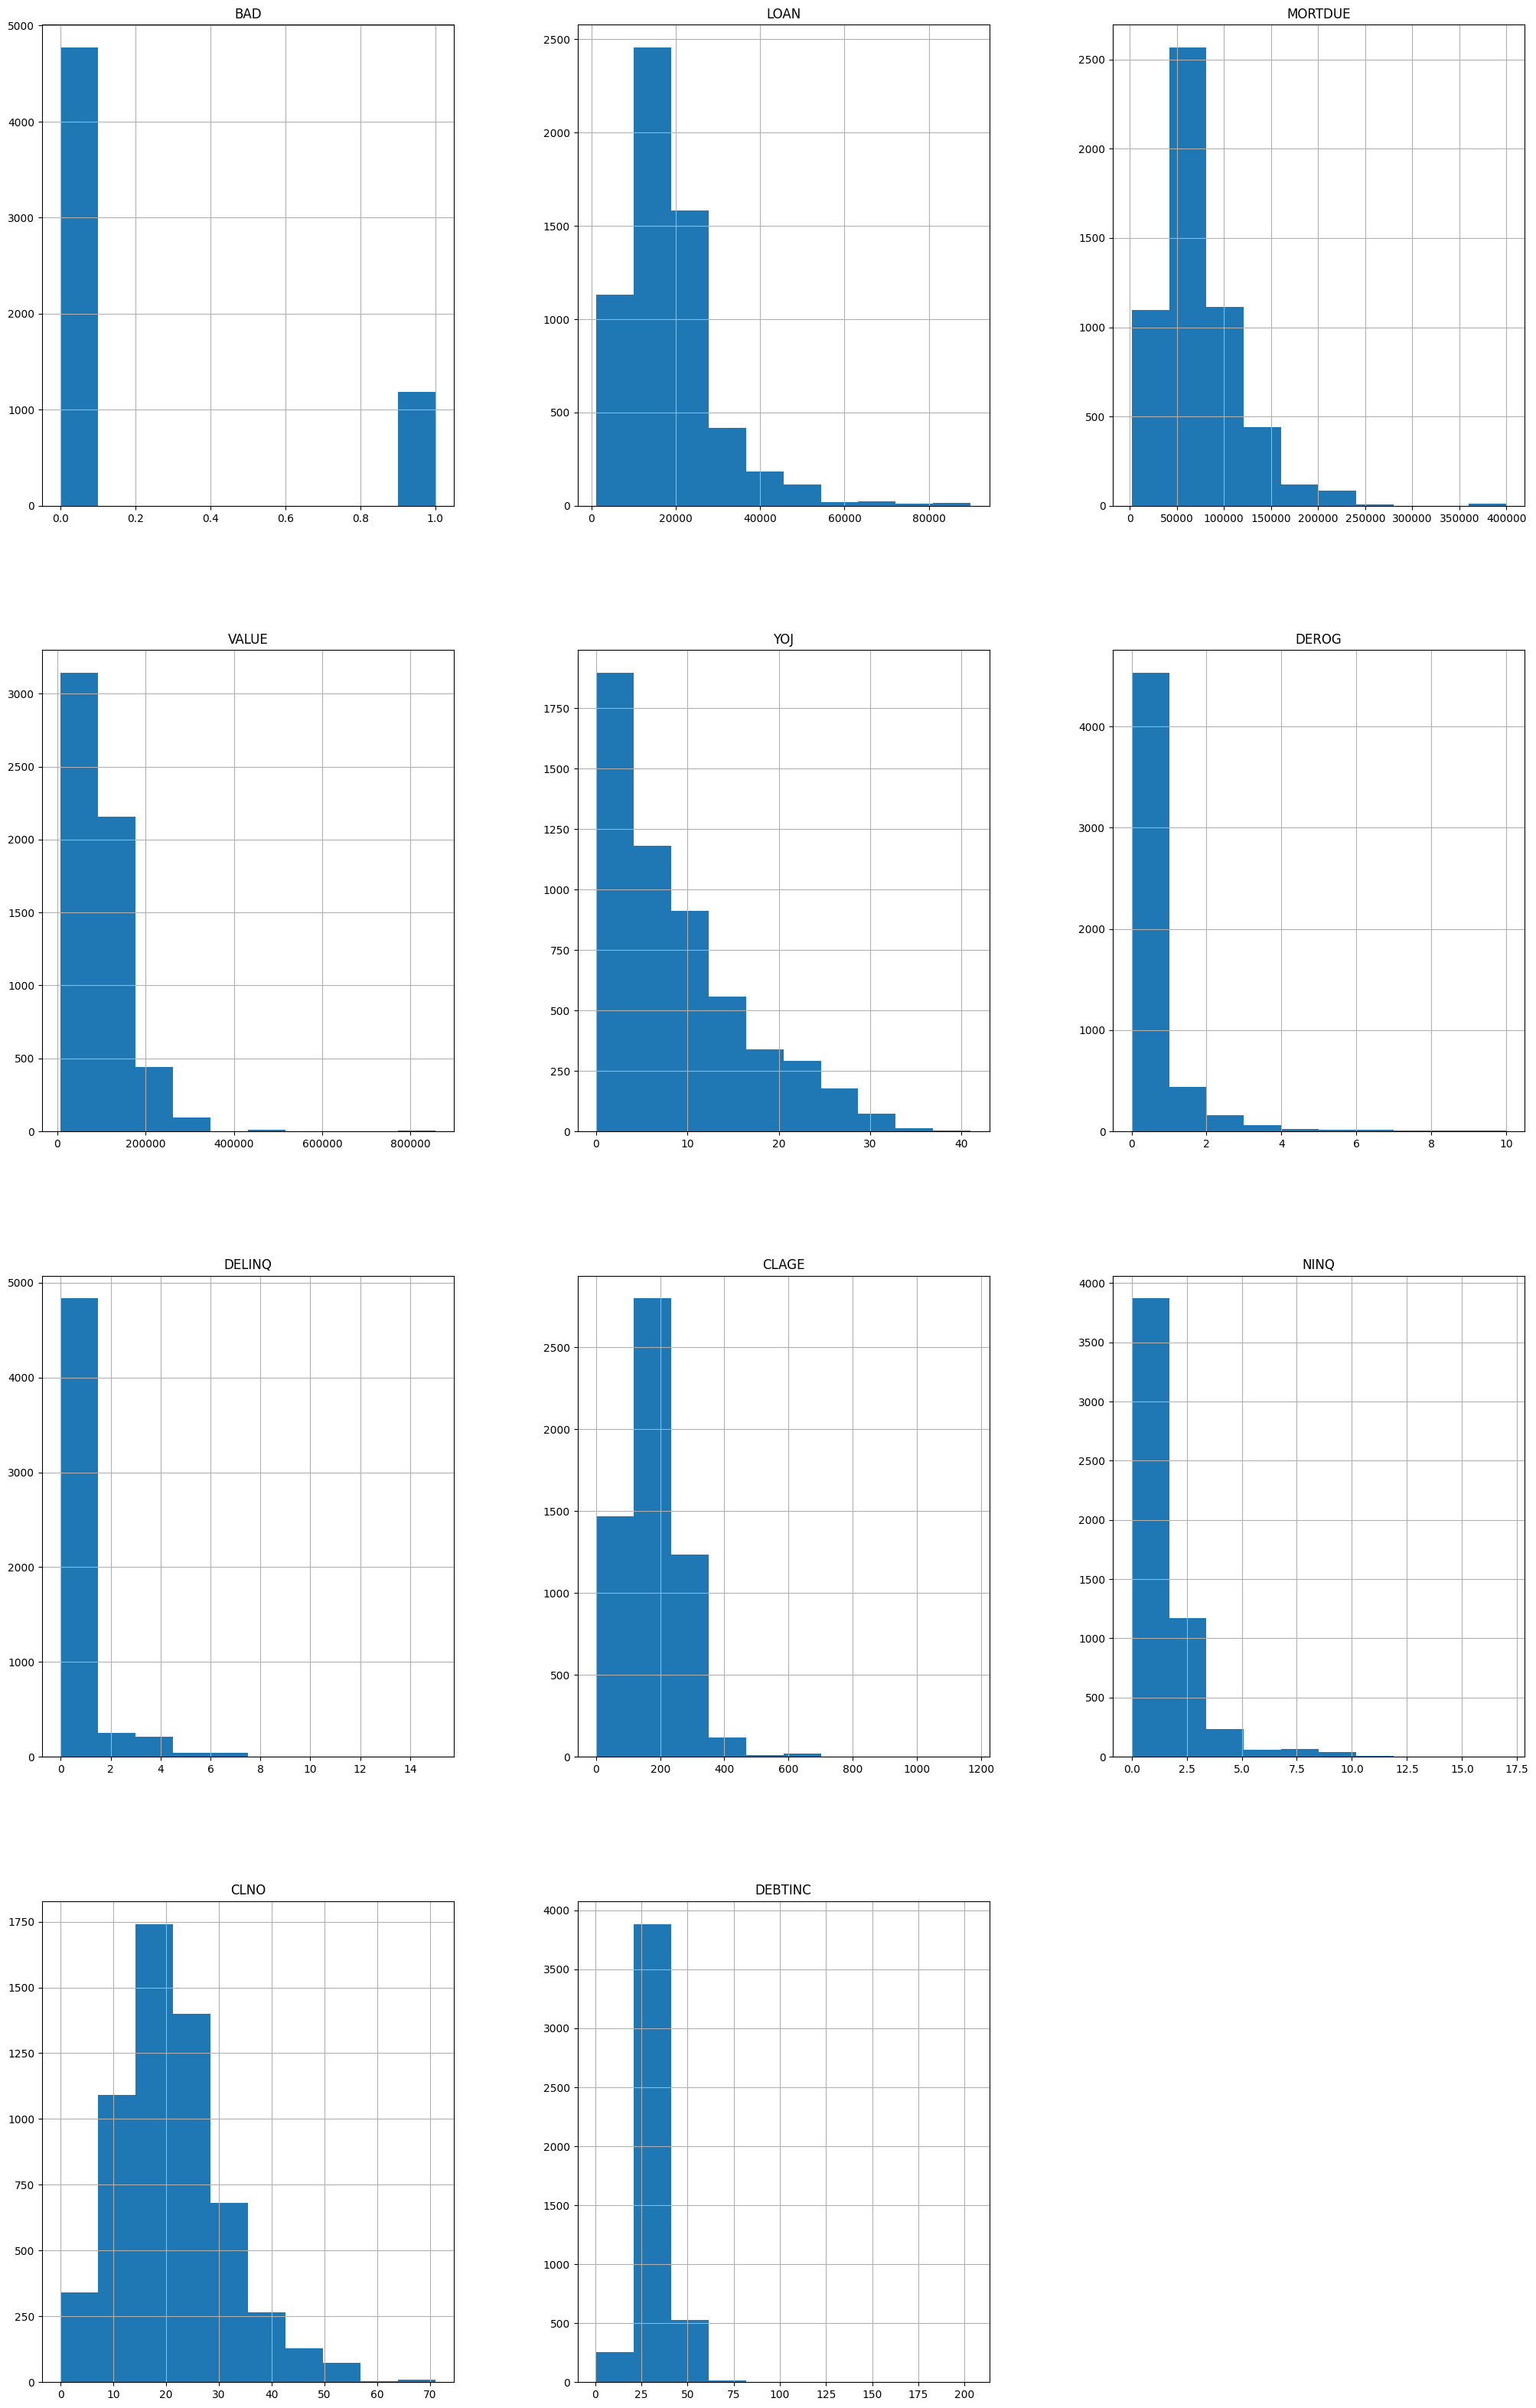

In [77]:
df.hist(figsize=(25,40))

# Pré-Processamento de dados

In [78]:
#imports 
# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [79]:
# separando as variáveis independentes e a variável dependente
X = df.drop(columns=['BAD'])
y = df['BAD']

# Variaveis numericas e categóricas
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Pipeline de pré-processamento
numeric_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")
print(f"Distribuição de classes no treino: {y_train.value_counts(normalize=True)}")

Tamanho do conjunto de treino: (4768, 18)
Tamanho do conjunto de teste: (1192, 18)
Distribuição de classes no treino: BAD
0    0.800545
1    0.199455
Name: proportion, dtype: float64


# Tratamento de Desbalanceamento

In [80]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [81]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Distribuição original: {y_train.value_counts()}")
print(f"Distribuição após SMOTE: {y_train_balanced.value_counts()}")

Distribuição original: BAD
0    3817
1     951
Name: count, dtype: int64
Distribuição após SMOTE: BAD
0    3817
1    3817
Name: count, dtype: int64


# Modelagem - Regressão logistica

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_grid = GridSearchCV(
    logistic_model, 
    logistic_params, 
    cv=cv, 
    scoring='roc_auc', 
    n_jobs=-1
)

# Treinamento
logistic_grid.fit(X_train_balanced, y_train_balanced)

print("Melhores parâmetros Regressão Logística:")
print(logistic_grid.best_params_)
print(f"Melhor score CV: {logistic_grid.best_score_:.4f}")

# Predição
logistic_pred = logistic_grid.predict(X_test)
logistic_proba = logistic_grid.predict_proba(X_test)[:, 1]

Melhores parâmetros Regressão Logística:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor score CV: 0.7899


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(
    rf_model, rf_params, cv=cv, 
    scoring='roc_auc', n_jobs=-1
)

# Treinamento
rf_grid.fit(X_train, y_train)  # Usando dados desbalanceados com class_weight

print("Melhores parâmetros Random Forest:")
print(rf_grid.best_params_)
print(f"Melhor score CV: {rf_grid.best_score_:.4f}")

# Predições
rf_pred = rf_grid.predict(X_test)
rf_proba = rf_grid.predict_proba(X_test)[:, 1]

Melhores parâmetros Random Forest:
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Melhor score CV: 0.9611


In [86]:
import xgboost as xgb
from xgboost import XGBClassifier

In [87]:
# XGBoost com parâmetros padrão
xgb_basic = XGBClassifier(
    random_state=42,
    eval_metric='logloss',  # Evita warnings
    verbosity=0  # Reduz output durante treinamento
)

# Treinamento simples
xgb_basic.fit(X_train, y_train)

# Predições básicas
xgb_basic_pred = xgb_basic.predict(X_test)
xgb_basic_proba = xgb_basic.predict_proba(X_test)[:, 1]


In [88]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# XGBoost com early stopping
xgb_early = XGBClassifier(
    n_estimators=1000,  # Número alto, early stopping vai parar
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.5,
    scale_pos_weight=3,
    random_state=42,
    eval_metric='logloss',
    verbosity=0,
    early_stopping_rounds=50,
)

xgb_early.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=False
)
print(f"Melhor iteração: {xgb_early.best_iteration}")
print(f"Melhor score de validação: {xgb_early.best_score:.4f}")

xgb_early_pred = xgb_early.predict(X_test)
xgb_early_proba = xgb_early.predict_proba(X_test)[:, 1]

Melhor iteração: 243
Melhor score de validação: 0.2342


In [89]:
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_auc_score, roc_curve, precision_recall_curve,
                           accuracy_score, precision_score, recall_score, f1_score)


=== Avaliação do Regressão Logística ===
Acurácia: 0.7290
Precisão: 0.3842
Recall: 0.5924
F1-Score: 0.4661
AUC-ROC: 0.7347


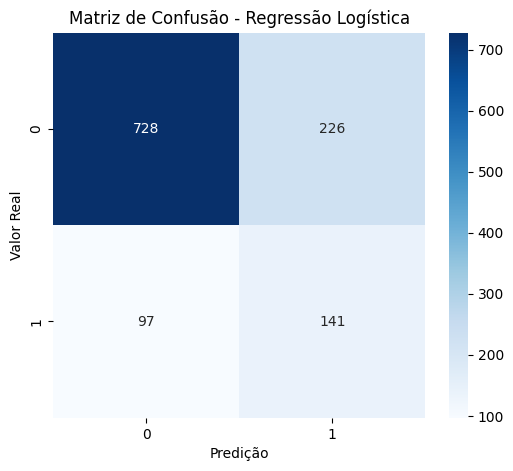

In [90]:
def evaluate_model(y_true, y_pred, y_proba, model_name):
    """Função para avaliar modelos de classificação"""
    print(f"\n=== Avaliação do {model_name} ===")
    
    # Métricas básicas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    
    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.ylabel('Valor Real')
    plt.xlabel('Predição')
    plt.show()
    
    return {'accuracy': accuracy, 'precision': precision, 
            'recall': recall, 'f1': f1, 'auc': auc}

# Avaliação dos modelos
logistic_metrics = evaluate_model(y_test, logistic_pred, logistic_proba, "Regressão Logística")


=== Avaliação do Random Forest ===
Acurácia: 0.9018
Precisão: 0.9618
Recall: 0.5294
F1-Score: 0.6829
AUC-ROC: 0.9587


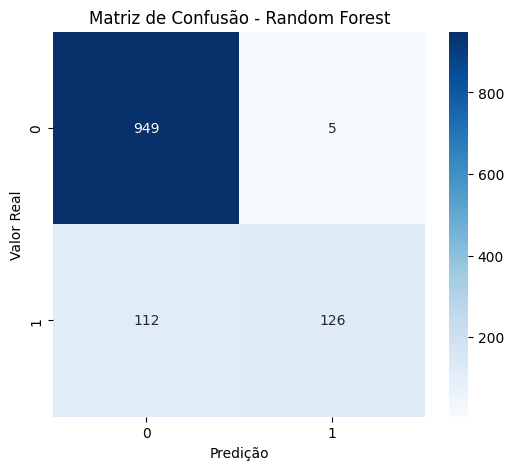

In [91]:
rf_metrics = evaluate_model(y_test, rf_pred, rf_proba, "Random Forest")


=== Avaliação do XGBoost ===
Acurácia: 0.9119
Precisão: 0.9236
Recall: 0.6092
F1-Score: 0.7342
AUC-ROC: 0.9203


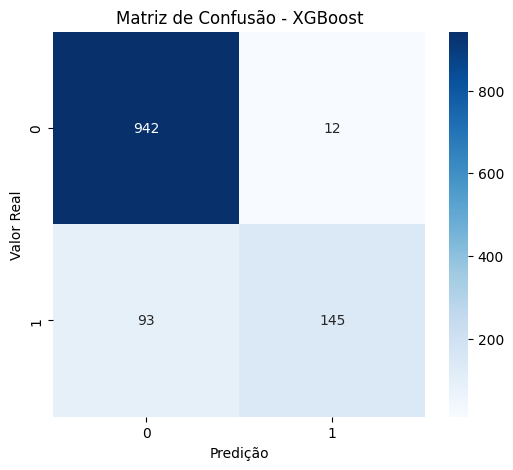

In [92]:
xg_metrics = evaluate_model(y_test, xgb_basic_pred, xgb_basic_proba, "XGBoost")


=== Avaliação do XGBoost com Early Stopping ===
Acurácia: 0.9094
Precisão: 0.8693
Recall: 0.6429
F1-Score: 0.7391
AUC-ROC: 0.9258


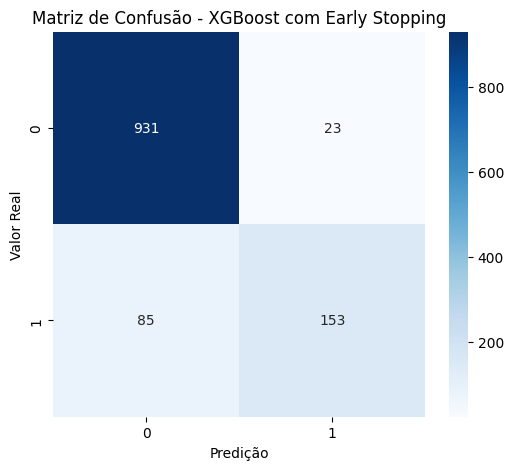

{'accuracy': 0.9093959731543624,
 'precision': 0.8693181818181818,
 'recall': 0.6428571428571429,
 'f1': 0.7391304347826086,
 'auc': np.float64(0.9258495851170657)}

In [93]:
evaluate_model(y_test, xgb_early_pred, xgb_early_proba, "XGBoost com Early Stopping")

# Salvando os modelos em arquivos

In [ ]:
import pickle
import os

In [ ]:

RL_model_file_name = "logistic_model.pkl"
path = os.path.join(os.getcwd(), RL_model_file_name)
with open(path, 'wb') as file:
    pickle.dump(logistic_grid, file)
print(f"Modelo de Regressão Logística salvo como {RL_model_file_name}")

RF_model_file_name = "rf_model.pkl"
path = os.path.join(os.getcwd(), RF_model_file_name)
with open(path, 'wb') as file:
    pickle.dump(rf_grid, file)
print(f"Modelo de Random Forest salvo como {RF_model_file_name}")

XGB_model_file_name = "xgb_model.pkl"
path = os.path.join(os.getcwd(), XGB_model_file_name)
with open(path, 'wb') as file:
    pickle.dump(xgb_early, file)
print(f"Modelo de XGBoost salvo como {XGB_model_file_name}")

XGBearly_model_file_name = "xgb_early_model.pkl"
path = os.path.join(os.getcwd(), XGBearly_model_file_name)
with open(path, 'wb') as file:
    pickle.dump(xgb_early, file)
print(f"Modelo de XGBoost com Early Stopping salvo como {XGBearly_model_file_name}")
